<a href="https://colab.research.google.com/github/wereketenge/Proyectos/blob/main/Indian_Car_Sell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-2-3384080996.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands.values, y=top_brands.index, palette="viridis")


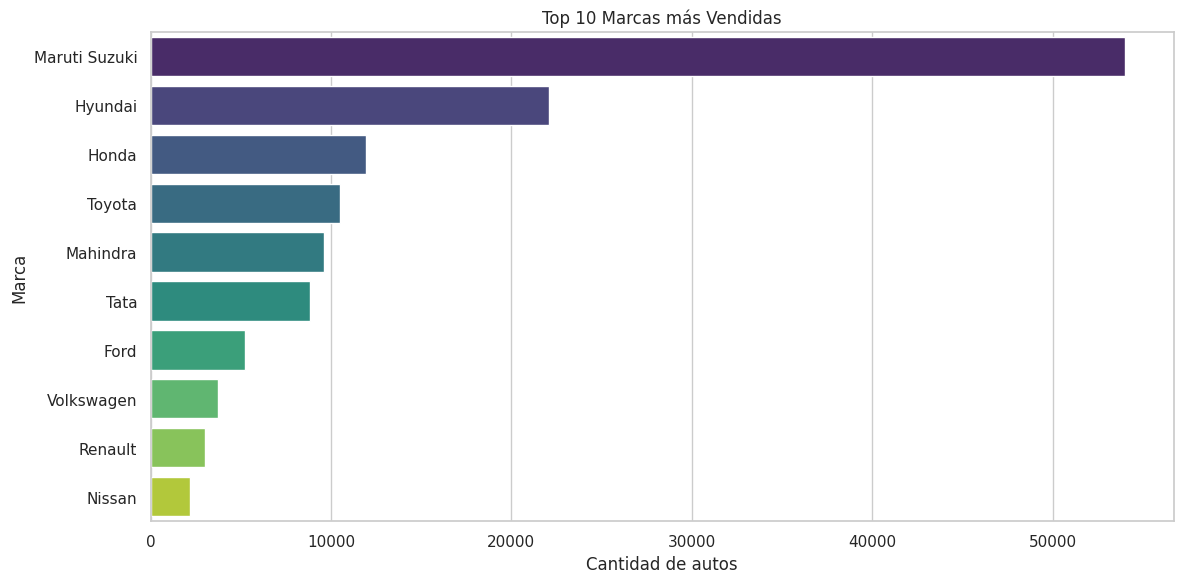

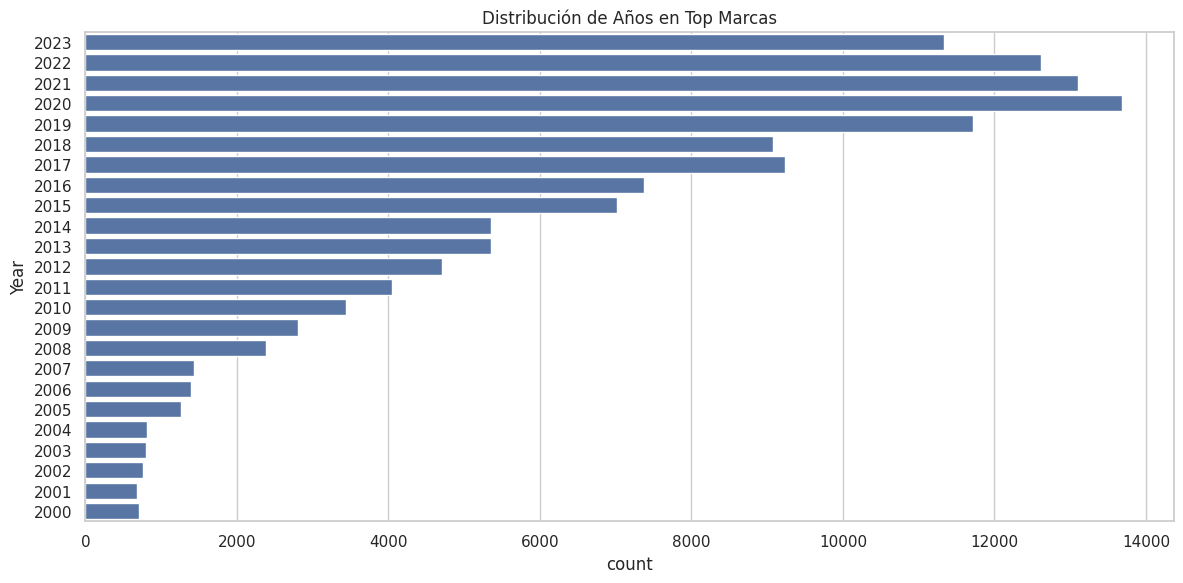

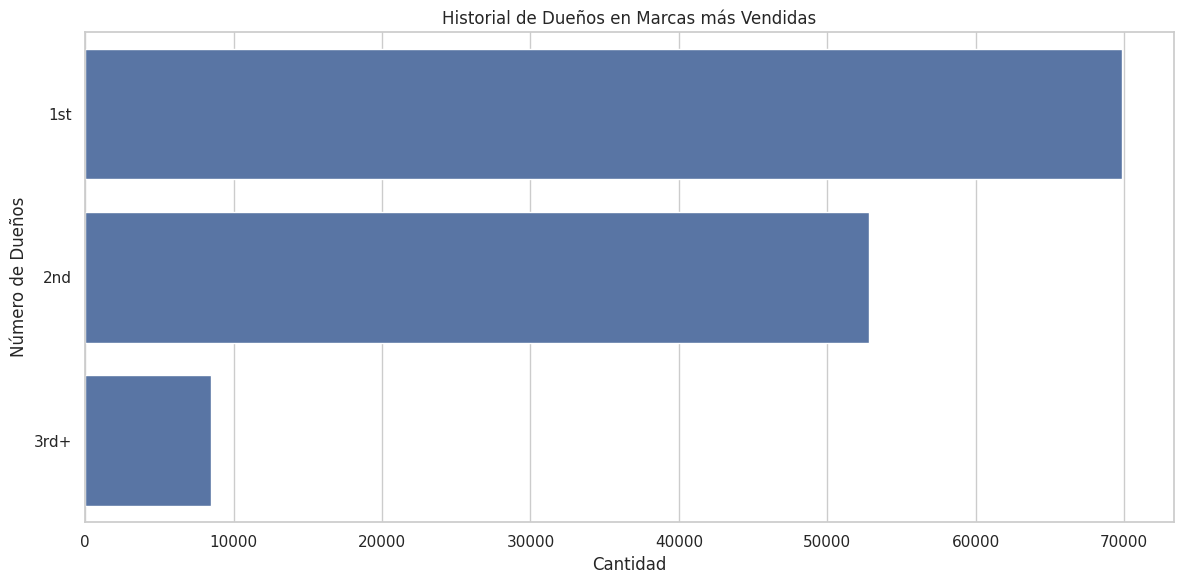

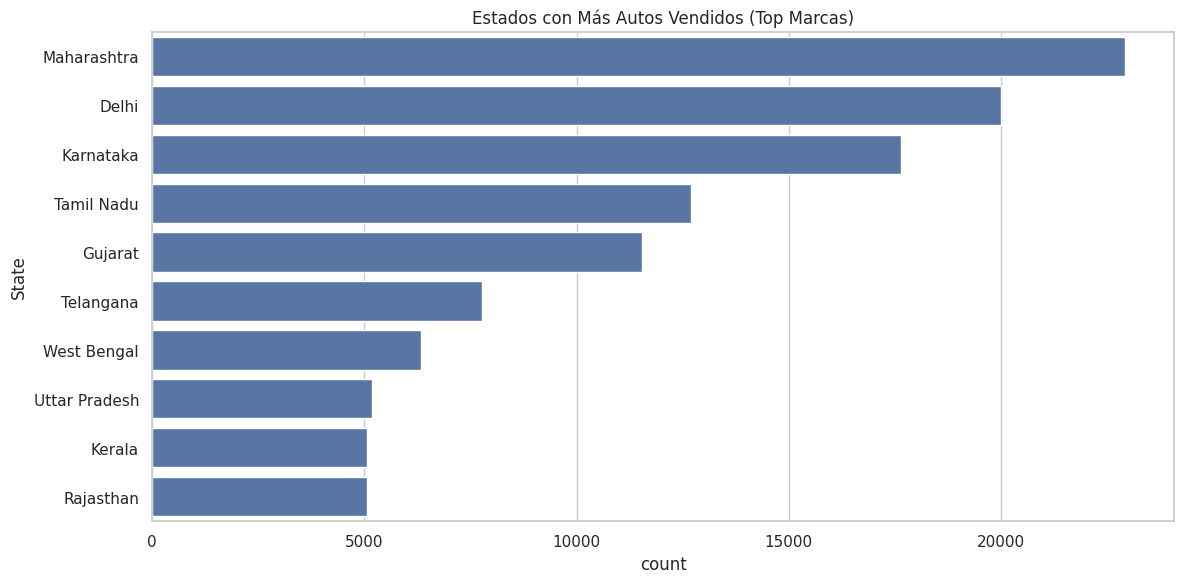

/tmp/ipython-input-2-3384080996.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price.values, y=avg_price.index, palette="crest")


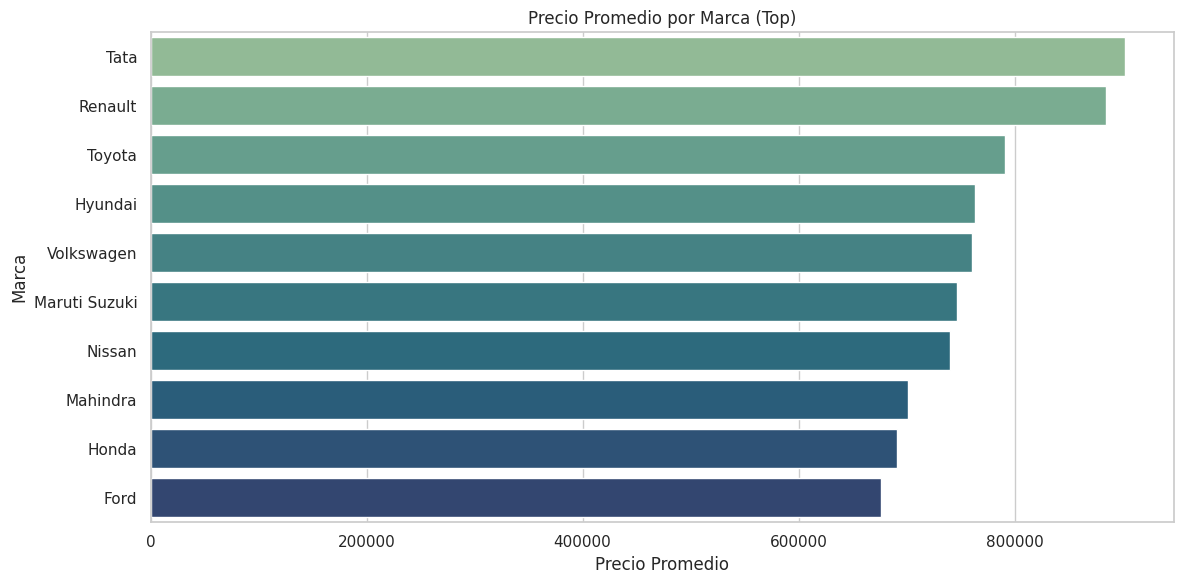

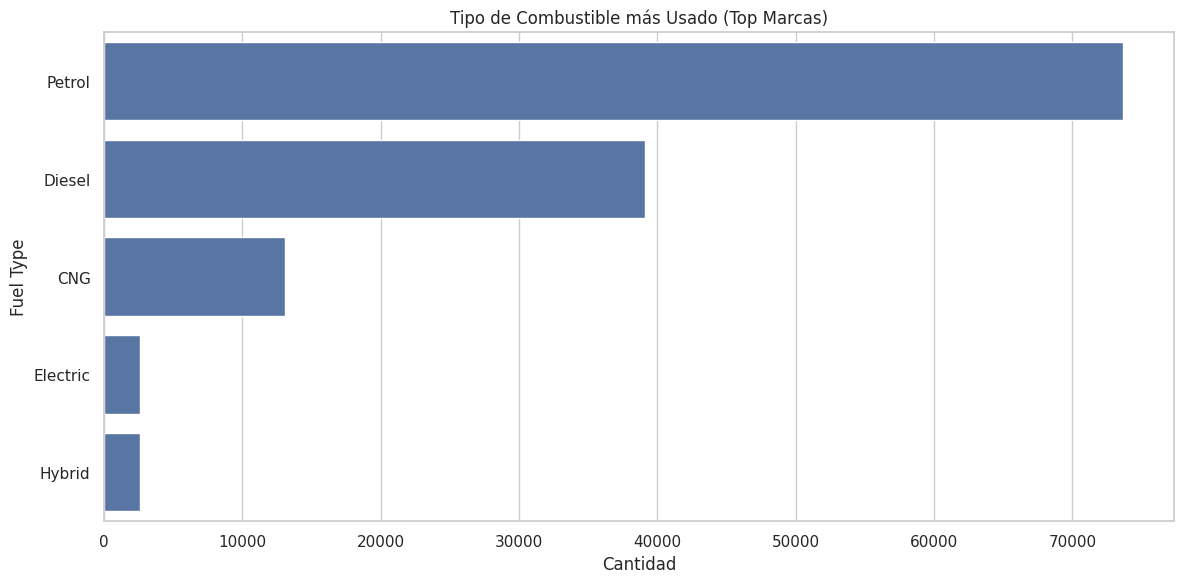

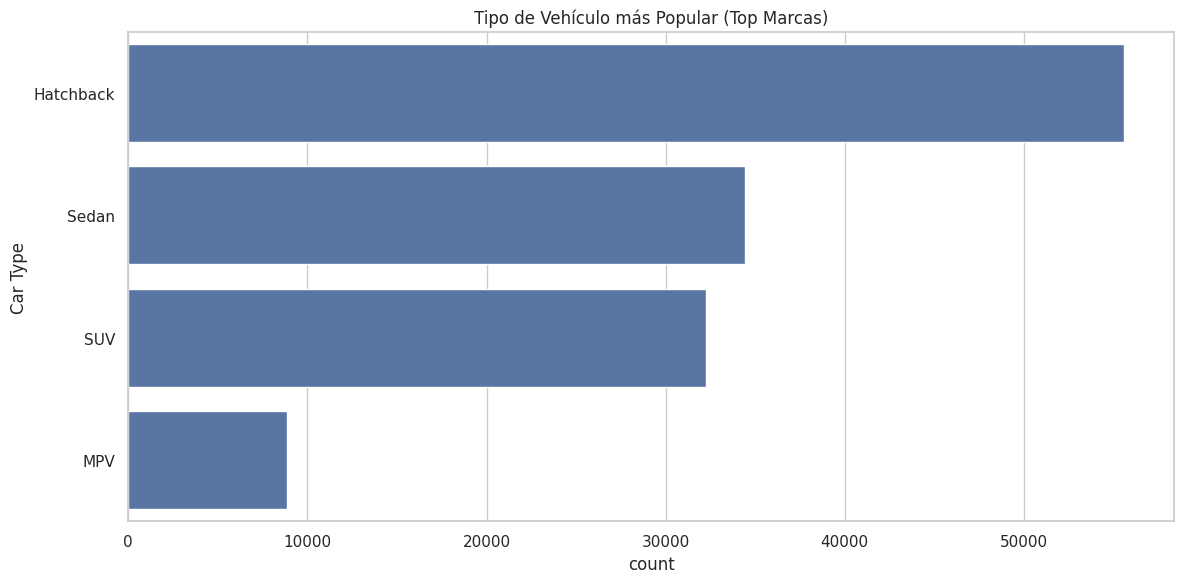

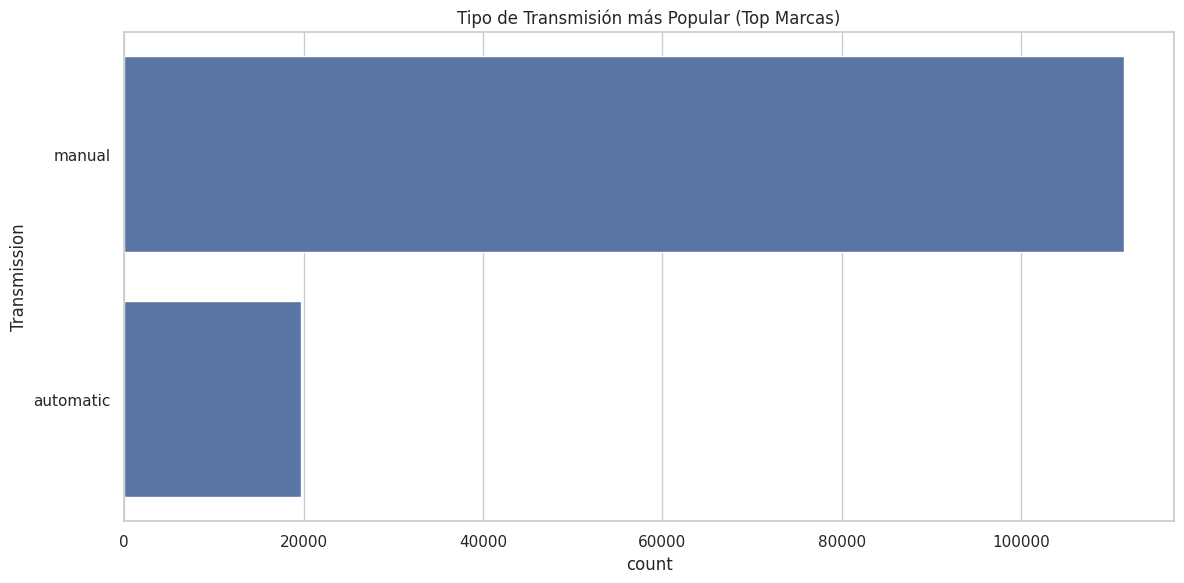

⚙️ Se venden 5.67 veces más autos MANUALES que AUTOMÁTICOS.

🔢 Conteo de transmisiones:
Transmission
manual       119793
automatic     21111
Name: count, dtype: int64

👥 Autos vendidos por número de dueños:
- 1st Owner: 75429 autos
- 2nd Owner: 56492 autos
- 3rd+ Owner: 8983 autos

🧠 Principales insights:


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Cargar el archivo desde Drive (link directo)
url = "https://drive.google.com/uc?export=download&id=1yZMVCNtybVzMdmNyQh_4YBpwVP7oYKUW"
df = pd.read_csv(url)

# Limpieza de columnas
df.columns = df.columns.str.strip()

# Limpieza de datos relevantes
df = df.dropna(subset=["Brand", "Year", "Price", "Fuel Type", "Transmission", "Car Type", "Owner", "State"])
df["Year"] = pd.to_numeric(df["Year"], errors="coerce")
df["Price"] = pd.to_numeric(df["Price"], errors="coerce")
df = df.dropna(subset=["Year", "Price"])

# Normalizar texto en columnas clave
df["Transmission"] = df["Transmission"].str.strip().str.lower()
df["Owner"] = df["Owner"].str.strip().str.lower()

# ========================
# ANÁLISIS EXPLORATORIO
# ========================

# Marcas más vendidas
top_brands = df["Brand"].value_counts().head(10)
plt.figure()
sns.barplot(x=top_brands.values, y=top_brands.index, palette="viridis")
plt.title("Top 10 Marcas más Vendidas")
plt.xlabel("Cantidad de autos")
plt.ylabel("Marca")
plt.tight_layout()
plt.show()

# Años más comunes en las marcas más vendidas
df_top_brands = df[df["Brand"].isin(top_brands.index)]
plt.figure()
sns.countplot(data=df_top_brands, y="Year", order=sorted(df_top_brands["Year"].astype(int).unique(), reverse=True))
plt.title("Distribución de Años en Top Marcas")
plt.tight_layout()
plt.show()

# Número de dueños
plt.figure()
sns.countplot(data=df_top_brands, y="Owner", order=df_top_brands["Owner"].value_counts().index)
plt.title("Historial de Dueños en Marcas más Vendidas")
plt.xlabel("Cantidad")
plt.ylabel("Número de Dueños")
plt.tight_layout()
plt.show()

# Estados más activos
plt.figure()
sns.countplot(data=df_top_brands, y="State", order=df_top_brands["State"].value_counts().head(10).index)
plt.title("Estados con Más Autos Vendidos (Top Marcas)")
plt.tight_layout()
plt.show()

# Precio promedio por marca
avg_price = df_top_brands.groupby("Brand")["Price"].mean().sort_values(ascending=False)
plt.figure()
sns.barplot(x=avg_price.values, y=avg_price.index, palette="crest")
plt.title("Precio Promedio por Marca (Top)")
plt.xlabel("Precio Promedio")
plt.ylabel("Marca")
plt.tight_layout()
plt.show()

# Tipo de combustible más común
fuel_count = df_top_brands["Fuel Type"].value_counts()
plt.figure()
sns.barplot(x=fuel_count.values, y=fuel_count.index)
plt.title("Tipo de Combustible más Usado (Top Marcas)")
plt.xlabel("Cantidad")
plt.tight_layout()
plt.show()

# Tipo de vehículo
plt.figure()
sns.countplot(data=df_top_brands, y="Car Type", order=df_top_brands["Car Type"].value_counts().index)
plt.title("Tipo de Vehículo más Popular (Top Marcas)")
plt.tight_layout()
plt.show()

# Tipo de transmisión
plt.figure()
sns.countplot(data=df_top_brands, y="Transmission", order=df_top_brands["Transmission"].value_counts().index)
plt.title("Tipo de Transmisión más Popular (Top Marcas)")
plt.tight_layout()
plt.show()

# ========================
# ANÁLISIS COMPARATIVO
# ========================

# Manual vs Automático
transmission_counts = df["Transmission"].value_counts()
manual_count = transmission_counts.get("manual", 0)
auto_count = transmission_counts.get("automatic", 0)

if auto_count > 0:
    ratio = manual_count / auto_count
    print(f"⚙️ Se venden {ratio:.2f} veces más autos MANUALES que AUTOMÁTICOS.")
else:
    print("⚠️ No se encontraron registros de transmisión automática.")

print("\n🔢 Conteo de transmisiones:")
print(transmission_counts)

# Conteo de dueños
owner_counts = df["Owner"].value_counts()
print("\n👥 Autos vendidos por número de dueños:")
for owner in ["1st", "2nd", "3rd+"]:
    count = owner_counts.get(owner.lower(), 0)
    print(f"- {owner} Owner: {count} autos")

print("\n🧠 Principales insights:")

